In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [21]:

# Replace 'file_path.txt' with the actual path to your uploaded file
df = pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\mulcam\서울특별시_전월세가_2017.txt', sep=',', encoding="cp949")
df.to_csv(r'C:\Users\bluek\OneDrive\Desktop\mulcam\서울특별시_전월세가_2017.csv', index=False)

C:\Users\bluek\AppData\Local\Temp\ipykernel_2748\461611886.py:2: DtypeWarning: Columns (6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\mulcam\서울특별시_전월세가_2017.txt', sep=',', encoding="cp949")


In [22]:
df= pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\mulcam\서울특별시_전월세가_2017.csv')

C:\Users\bluek\AppData\Local\Temp\ipykernel_2748\3498530529.py:1: DtypeWarning: Columns (6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\mulcam\서울특별시_전월세가_2017.csv')


In [23]:
unique_count = df['법정동명'].nunique()
print("법정동명 칼럼의 고유값 개수:", unique_count)
count_monthly_rental = df[df['전월세구분'] == '월세'].shape[0]

print("월세 갯수:", count_monthly_rental)

count_monthly_rental = df[df['전월세구분'] == '전세'].shape[0]

print("전세 갯수:", count_monthly_rental)

법정동명 칼럼의 고유값 개수: 394
월세 갯수: 171094
전세 갯수: 227198


In [24]:
# 면적당 평균 보증금 계산
df['평당평균보증금'] = df['보증금(만원)']*3.3 / df['임대면적']

# 면적당 평균 임대료 계산
df['평당평균임대료'] = df['임대료(만원)']*3.3 / df['임대면적']

# 그룹별로 면적당 평균 보증금과 임대료, 그리고 보증금과 임대료의 최댓값과 최솟값 계산
result = df.groupby(['법정동명', '전월세구분', '건물용도']).agg({
    '평당평균보증금': 'mean',
    '평당평균임대료': 'mean',
    '보증금(만원)': ['max', 'min'],
    '임대료(만원)': ['max', 'min']
}).reset_index()

# 칼럼명 변경
result.columns = ['법정동', '전월세구분', '건물용도', '평당평균보증금(만원)', '평당평균임대료(만원)', '최대보증금(만원)', '최소보증금(만원)', '최대임대료(만원)', '최소임대료(만원)']

# 결과 반환
result
price = result.round(0)
# 결과 출력
print(price)

      법정동 전월세구분   건물용도  평당평균보증금(만원)  평당평균임대료(만원)  최대보증금(만원)  최소보증금(만원)  \
0     가락동    월세  단독다가구        302.0          4.0      25000          0   
1     가락동    월세    아파트       1000.0          3.0      60000       1000   
2     가락동    월세  연립다세대        635.0          5.0      35000        200   
3     가락동    월세   오피스텔        189.0          6.0      15000        400   
4     가락동    전세  단독다가구        990.0          0.0      33000       3000   
...   ...   ...    ...          ...          ...        ...        ...   
2391  흥인동    월세    아파트        339.0         11.0      25000       1000   
2392  흥인동    월세   오피스텔        258.0         10.0      10000       1000   
2393  흥인동    전세  단독다가구        612.0          0.0       8500       8500   
2394  흥인동    전세    아파트       2115.0          0.0     120000      13000   
2395  흥인동    전세   오피스텔       2254.0          0.0      67000      13000   

      최대임대료(만원)  최소임대료(만원)  
0           175          5  
1           550          6  
2           100         

In [25]:
price.to_csv(r'C:\Users\bluek\OneDrive\Desktop\rent\rent_2017.csv', index=False)

In [26]:
import pandas as pd

# Load the datasets
df_2017 = pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\rent\rent_2017.csv')
df_2018 = pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\rent\rent_2018.csv')
df_2019 = pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\rent\rent_2019.csv')
df_2020 = pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\rent\rent_2020.csv')
df_2021 = pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\rent\rent_2021.csv')
df_2022 = pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\rent\rent_2022.csv')
df_2023 = pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\rent\rent_2023.csv')

df_2017['접수년도'] = 2017
df_2018['접수년도'] = 2018
df_2019['접수년도'] = 2019
df_2020['접수년도'] = 2020
df_2021['접수년도'] = 2021
df_2022['접수년도'] = 2022
df_2023['접수년도'] = 2023


# Combine the datasets
df_combined = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023])


# Correcting a small mistake in the filtering line: Use 'df_combined' instead of 'df'
filtered_df = df_combined[(df_combined['전월세구분'] == '전세')]

# Group by 접수년도 and 건물용도 for the filtered 전세 and 아파트 data
yearly_building_type_average = filtered_df.groupby(['접수년도', '건물용도'])['평당평균보증금(만원)'].mean()

print(yearly_building_type_average)

df_combined.to_csv(r'C:\Users\bluek\OneDrive\Desktop\rent\total_rent_data.csv', index=False)

접수년도  건물용도 
2017  단독다가구     954.901734
      아파트      1680.560127
      연립다세대    1438.794953
      오피스텔     1668.057778
2018  단독다가구     980.316092
      아파트      1823.392157
      연립다세대    1561.896552
      오피스텔     1826.812227
2019  단독다가구    1050.243478
      아파트      1872.535604
      연립다세대    1700.507740
      오피스텔     1959.747899
2020  단독다가구    1121.447293
      아파트      2084.018868
      연립다세대    1930.000000
      오피스텔     2214.385246
2021  단독다가구    1211.072886
      아파트      2346.539432
      연립다세대    2103.350932
      오피스텔     2439.122449
2022  단독다가구    1314.127219
      아파트      2384.268139
      연립다세대    2194.993730
      오피스텔     2619.590909
2023  단독다가구    1283.816024
      아파트      2243.952978
      연립다세대    2066.229814
      오피스텔     2508.093496
Name: 평당평균보증금(만원), dtype: float64


보고 싶은 법정동을 입력하세요:  구의동


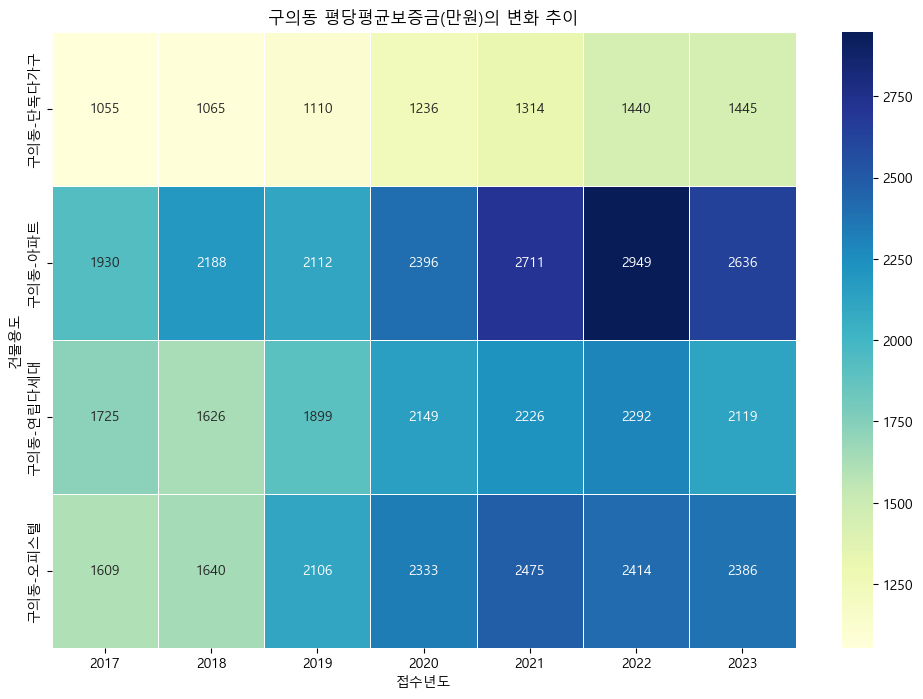

In [27]:
# Filter for '전세' contracts
df_jeonse = df_combined[df_combined['전월세구분'] == '전세']

# Group by 법정동명, 건물용도, and 접수년도 to calculate mean 보증금 for each group
result = df_jeonse.groupby(['법정동', '건물용도', '접수년도'])['평당평균보증금(만원)'].mean().reset_index()

# Pivot the data for better trend visualization
pivot_result = result.pivot_table(index=['법정동', '건물용도'], columns='접수년도', values='평당평균보증금(만원)')

# Ask for the 법정동 input
selected_dong = input("보고 싶은 법정동을 입력하세요: ")

# Filter the pivot_result for the selected 법정동
heatmap_data = pivot_result.loc[pivot_result.index.get_level_values('법정동') == selected_dong]

# Check if there is any data to plot
if not heatmap_data.empty:
    # Plotting the filtered data
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
    plt.title(f'{selected_dong} 평당평균보증금(만원)의 변화 추이')
    plt.xlabel('접수년도')
    plt.ylabel('건물용도')
    plt.show()
else:
    print("선택한 법정동에 대한 데이터가 없습니다.")


In [28]:
def plot_trends(df_combined, selected_dong, building_type):
    building_type = [bt.strip() for bt in building_type.split(',')]
    color_palette = sns.color_palette("hsv", len(building_type))

    plt.figure(figsize=(12, 6))
    
    filtered_data = df_combined[(df_combined['전월세구분'] == '전세')]
    
    for i, building_type in enumerate(building_type):
        specific_data = filtered_data[(filtered_data['건물용도'] == building_type) & (filtered_data['법정동'] == selected_dong)]
        
        if not specific_data.empty:
            sns.lineplot(data=specific_data, x='접수년도', y='평당평균보증금(만원)', label=f'{selected_dong} - {building_type}', marker='o', linewidth=3, color=color_palette[i])
            for x, y in zip(specific_data['접수년도'], specific_data['평당평균보증금(만원)']):
                plt.text(x, y, f'{y:.0f}', color=color_palette[i], ha='center', va='bottom')
        
        average_data = filtered_data[filtered_data['건물용도'] == building_type].groupby('접수년도')['평당평균보증금(만원)'].mean().reset_index()
        average_data['법정동'] = '서울시 평균 - ' + building_type
                
        sns.lineplot(data=average_data, x='접수년도', y='평당평균보증금(만원)', label=f'서울시 평균 - {building_type}', linestyle='--', linewidth=2)
        for x, y in zip(average_data['접수년도'], average_data['평당평균보증금(만원)']):
            plt.text(x, y, f'{y:.0f}', color=color_palette[i], ha='center', va='bottom')

    plt.title(f'{selected_dong}의 {building_type} 연도별 평당평균보증금(만원) 변화')
    plt.xlabel('접수년도')
    plt.ylabel('평당평균보증금(만원)')
    plt.legend()
    plt.tight_layout()
    plt.show()


관심있는 법정동을 입력하세요:  구의동
관심있는 건물용도를 입력하세요 (쉼표로 구분하여 여러 개 입력 가능, 예: 아파트,연립다세대):  아파트, 연립다세대


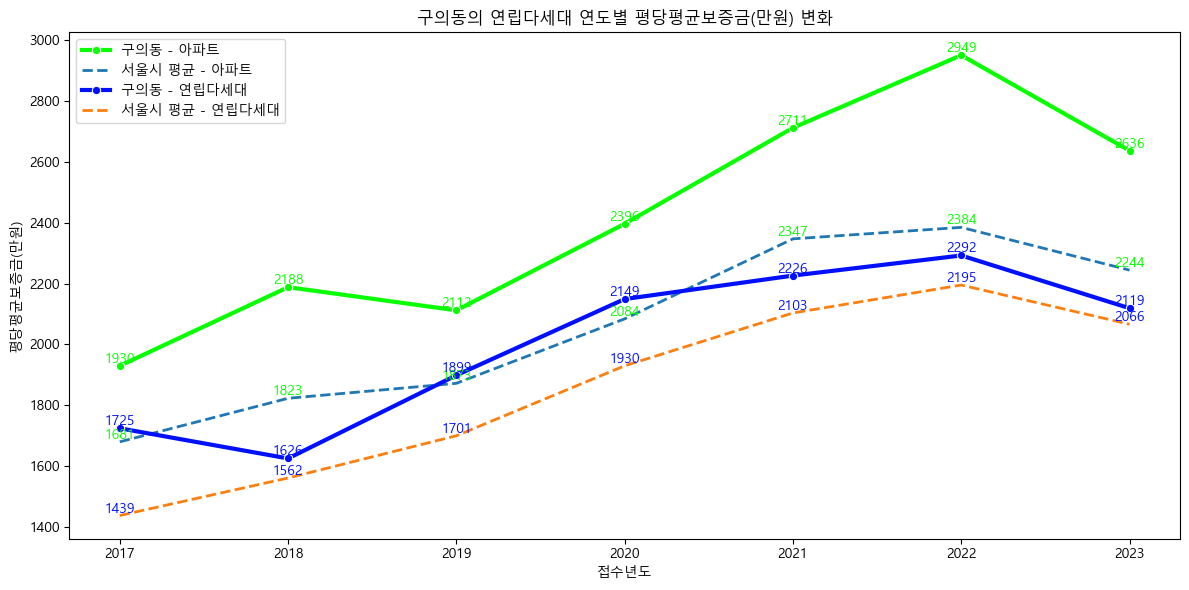

In [29]:
selected_dong = input("관심있는 법정동을 입력하세요: ")
building_type = input("관심있는 건물용도를 입력하세요 (쉼표로 구분하여 여러 개 입력 가능, 예: 아파트,연립다세대): ")
df_combined =pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\mulcam\서울특별시_전월세가_2017.csv')
plot_trends(df_combined, selected_dong, building_type)